## PMOD ADC Reading Waveforms

This is a demo on Zybo with PMOD ADC. 

Although all the 3 channels are enabled, we are reading from one channel each time.

The analog waveform is generated by:

1. **Hardware**: Digilent Analog Discovery 2:
http://store.digilentinc.com/analog-discovery-2-100msps-usb-oscilloscope-logic-analyzer-and-variable-power-supply/
<tr>
<td> <img src=http://cdn6.bigcommerce.com/s-7gavg/products/468/images/2617/Analog_Discovery_2_obl_Academic_600__01249.1447804398.1280.1280.png alt="Drawing" style="width: 250px;"/> </td>
</tr>

2. **Software**: WaveForms 2015:
https://reference.digilentinc.com/waveforms3#newest

<tr>
<td> <img src=http://cdn6.bigcommerce.com/s-7gavg/products/481/images/2623/TILE_WaveForms2015_150__84968.1447878611.1280.1280.png alt="Drawing" style="width: 250px;"/> </td>
<td> <img src=http://cdn6.bigcommerce.com/s-7gavg/products/481/images/3961/img.07.0__38949.1458772469.1280.1280.png alt="Drawing" style="width: 250px;"/> </td>
</tr>

For the waveform to be displayed properly, we collect a minimum of 20 points in each period. 

Let us denote the interval between samples in the log as $ t $. We denote the period and frequency of the waveform as $T$ and $f$, respectively. In our implementation, the minimum delay between samples is 1ms.

$ T = \frac{1}{f} = 20\cdot t \geq 20\times 0.001 = 0.02$

So we have:
$ f \leq \frac{1}{0.02} = 50$

This means the frequency of the waveform has to be less than 50Hz for a better display.

Type in the PMOD ID of the ADC (1 ~ 4): 4
Type in the frequency/Hz of the waveform: 2


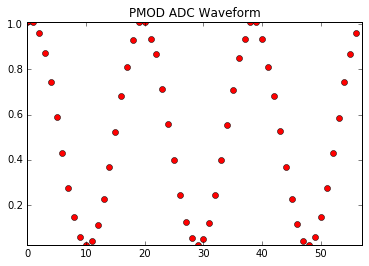

In [1]:
from time import sleep
from pynq import Overlay
from pynq.pmods import PMOD_ADC
from pynq.pmods import PMOD_DAC
from pynq.pmods import PMOD_OLED

ol = Overlay("pmod.bit")
ol.download()
adc_id = int(input("Type in the PMOD ID of the ADC (1 ~ 4): "))
adc = PMOD_ADC(adc_id)
freq = int(input("Type in the frequency/Hz of the waveform: "))
period = 1/freq
log_interval_ms = int(1000*period/20)

#: Assume Channel 0 is connected to the waveform generator
adc.start_log(0, log_interval_ms)
sleep(3*period)
log = adc.get_log()

#: Draw the figure
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(log)), log, 'ro')
plt.title('PMOD ADC Waveform')
plt.axis([0, len(log), min(log), max(log)])
plt.show()

adc.reset()
ol.reset_ip_dict()
del adc,ol